In [60]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import xgboost as xgb

import matplotlib.pyplot as plt


In [8]:
data = pd.read_csv('take_home_file.csv')

data['owner_earnings_log'] = np.log(data['owner_earnings'])


categorical_features = ['make', 'model', 'delivery_type', 'market_area']
numerical_features = ['vehicle_price', 'trip_length']
target = 'owner_earnings_log'

data

,reservation_id,created,driver_id,owner_id,vehicle_id,driver_age,market_area,delivery_type,make,model,...,delivery_fee,other_fee,total_fees,gross_revenue,owner_earnings,net_revenue,turo_take_home_rate,countcolumn,age_bucket,owner_earnings_log
0,1603541,1/1/2017,167324,850751,158769,62.0,Market A,Airport Delivery,Nissan,Sentra,...,0.0,15.45,26.25,134.25,96.00,38.25,28.49%,1,65+,4.564348
1,1537732,1/1/2017,216764,1906594,217449,39.0,Market A,Airport Delivery,Dodge,Grand Caravan,...,0.0,9.27,177.42,850.02,513.45,336.57,39.60%,1,36-40,6.241153
2,1603829,1/1/2017,581695,850751,211771,45.0,Market A,Airport Delivery,Chevrolet,Equinox,...,0.0,0.00,7.70,84.70,57.75,26.95,31.82%,1,41-45,4.056123
3,1566375,1/1/2017,585788,1155720,190819,28.0,Market B,Airport Delivery,Mercedes-Benz,C-Class,...,20.0,0.00,53.75,188.75,116.25,72.50,38.41%,1,26-35,4.755743
4,1606634,1/1/2017,781705,1387396,175907,23.0,Market A,No Delivery,Chrysler,PT Cruiser,...,0.0,0.00,10.80,34.80,18.00,16.80,48.28%,1,18-25,2.890372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87664,4024828,12/31/2018,8918352,3952673,481390,28.0,Market A,No Delivery,Ford,Mustang,...,0.0,0.00,35.43,84.43,36.75,47.68,56.47%,1,26-35,3.604138
87665,4024449,12/31/2018,8918657,3952673,481264,23.0,Market A,No Delivery,Ford,Mustang,...,0.0,5.00,41.28,86.28,38.25,48.03,55.67%,1,18-25,3.644144
87666,4027078,12/31/2018,8919595,2443012,301939,22.0,Market A,No Delivery,Chevrolet,Corvette,...,0.0,0.00,82.10,203.10,90.75,112.35,55.32%,1,18-25,4.508108
87667,4025266,12/31/2018,8920084,878824,125682,43.0,Market B,No Delivery,Honda,CR-V,...,0.0,0.00,23.95,62.95,29.25,33.70,53.53%,1,41-45,3.375880


In [9]:

encoder = OneHotEncoder(handle_unknown='ignore')
encoded_features = encoder.fit_transform(data[categorical_features])


encoded_features_df = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out(categorical_features))


preprocessed_data = pd.concat([data[numerical_features], encoded_features_df], axis=1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(preprocessed_data, data[target], test_size=0.2, random_state=42)


In [11]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [12]:
rf_pred = rf_model.predict(X_test)

In [13]:
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
print("Random Forest Regression:")
print(f"Mean Squared Error: {rf_mse:.2f}")
print(f"R-squared: {rf_r2:.2f}")

Random Forest Regression:
Mean Squared Error: 0.14
R-squared: 0.80


In [14]:
gb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [15]:
gb_pred = gb_model.predict(X_test)

In [16]:
gb_mse = mean_squared_error(y_test, gb_pred)
gb_r2 = r2_score(y_test, gb_pred)
print("\nGradient Boosting Regression (XGBoost):")
print(f"Mean Squared Error: {gb_mse:.2f}")
print(f"R-squared: {gb_r2:.2f}")


Gradient Boosting Regression (XGBoost):
Mean Squared Error: 0.14
R-squared: 0.81


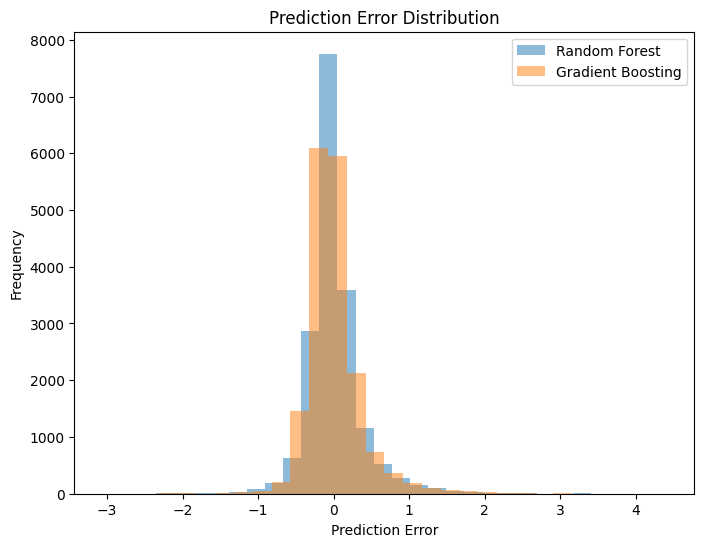

In [21]:
plt.figure(figsize=(8, 6))
plt.hist(y_test - rf_pred, bins=30, alpha=0.5, label='Random Forest')
plt.hist(y_test - gb_pred, bins=30, alpha=0.5, label='Gradient Boosting')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Prediction Error Distribution')
plt.legend()
plt.show()

In [91]:
rf_importance = rf_model.feature_importances_
gb_importance = gb_model.feature_importances_

rf_importance_sorted = sorted(zip(rf_importance,feature_names), reverse=True)
gb_importance_sorted = sorted(zip(gb_importance,feature_names), reverse=True)

print(rf_importance_sorted)

print(gb_importance_sorted)

[(0.5603104804990383, 'model'), (0.3083636247766816, 'make'), (0.0007430692679522318, 'trip_length'), (0.00019589117139469814, 'market_area'), (0.00017169294668280868, 'delivery_type'), (3.000022811526433e-05, 'vehicle_price')]
[(0.043368895, 'model'), (0.020306762, 'make'), (0.006829201, 'trip_length'), (0.0045172847, 'market_area'), (0.0010495122, 'vehicle_price'), (0.00033853043, 'delivery_type')]


In [97]:
rf_top_features = [feature[1] for feature in rf_importance_sorted]
rf_top_importances = [importance[0] for importance in rf_importance_sorted] 
print(rf_top_features)
print(rf_top_importances)
gb_top_features = [feature[1] for feature in gb_importance_sorted]
gb_top_importances = [importance[0] for importance in gb_importance_sorted] 
print(gb_top_features)
print(gb_top_importances)
# gb_top_features = ['make', 'model', 'trip_length', 'market_area']
# gb_top_importances = [0.03, 0.025, 0.02, 0.01]

['model', 'make', 'trip_length', 'market_area', 'delivery_type', 'vehicle_price']
[0.5603104804990383, 0.3083636247766816, 0.0007430692679522318, 0.00019589117139469814, 0.00017169294668280868, 3.000022811526433e-05]
['model', 'make', 'trip_length', 'market_area', 'vehicle_price', 'delivery_type']
[0.043368895, 0.020306762, 0.006829201, 0.0045172847, 0.0010495122, 0.00033853043]


In [98]:
feature_names = ['make', 'model', 'delivery_type', 'market_area','vehicle_price', 'trip_length']

print("Random Forest Feature Importance Scores:")
for feature, importance in zip(feature_names, rf_top_importances):
    print(f"{feature}: {importance}")

print("Gradient Boosting Feature Importance Scores:")
for feature, importance in zip(feature_names, gb_top_importances):
    print(f"{feature}: {importance}")

Random Forest Feature Importance Scores:
make: 0.5603104804990383
model: 0.3083636247766816
delivery_type: 0.0007430692679522318
market_area: 0.00019589117139469814
vehicle_price: 0.00017169294668280868
trip_length: 3.000022811526433e-05
Gradient Boosting Feature Importance Scores:
make: 0.04336889460682869
model: 0.02030676230788231
delivery_type: 0.006829200778156519
market_area: 0.0045172846876084805
vehicle_price: 0.0010495121823623776
trip_length: 0.00033853042987175286


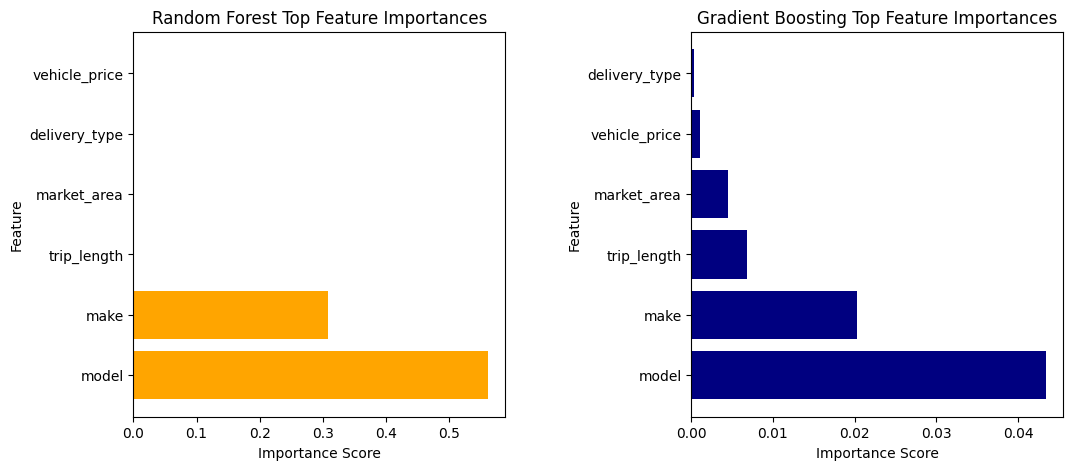

In [100]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

rf_top_features = list(rf_top_features[::-1])
rf_top_importances = list(rf_top_importances[::-1])
gb_top_features = list(gb_top_features[::-1])
gb_top_importances = list(gb_top_importances[::-1]) 

rf_positions = np.arange(len(rf_top_features)) + 0.5
ax1.barh(rf_positions, rf_top_importances, align='center', color='orange', label='Random Forest')
ax1.set_yticks(rf_positions)
ax1.set_yticklabels(rf_top_features)
ax1.set_xlabel('Importance Score')
ax1.set_ylabel('Feature')
ax1.set_title('Random Forest Top Feature Importances')

gb_positions = np.arange(len(gb_top_features)) + 0.5
ax2.barh(gb_positions, gb_top_importances, align='center', color='navy', label='Gradient Boosting')
ax2.set_yticks(gb_positions)
ax2.set_yticklabels(gb_top_features)
ax2.set_xlabel('Importance Score')
ax2.set_ylabel('Feature')
ax2.set_title('Gradient Boosting Top Feature Importances')

plt.subplots_adjust(wspace=0.5)


plt.show()